Humpback Whale Classification
==================

[Everyday I am Kaggling](https://www.kaggle.com/c/whale-categorization-playground)

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Reading dataset

In [91]:
train_data = pd.read_csv('train.csv', sep=',',header=0)
training_values = train_data['Image'].values
training_labels = train_data.drop('Image', 1).values

print("The whale dataset is a folder named `train` with whale images names.")
print("The whale dataset contains a `train.csv` which maps image name with Id\n")
print(train_data.head(10))
print("\nThere are some whales which are not identifed and thus labelled `new_whale`")

The whale dataset is a folder named `train` with whale images names.
The whale dataset contains a `train.csv` which maps image name with Id

          Image         Id
0  00022e1a.jpg  w_e15442c
1  000466c4.jpg  w_1287fbc
2  00087b01.jpg  w_da2efe0
3  001296d5.jpg  w_19e5482
4  0014cfdf.jpg  w_f22f3e3
5  0025e8c2.jpg  w_8b1ca89
6  0026a8ab.jpg  w_eaad6a8
7  0031c258.jpg  new_whale
8  0035632e.jpg  w_3d0bc7a
9  0037e7d3.jpg  w_50db782

There are some whales which are not identifed and thus labelled `new_whale`


## Preview the images

<IPython.core.display.Javascript object>


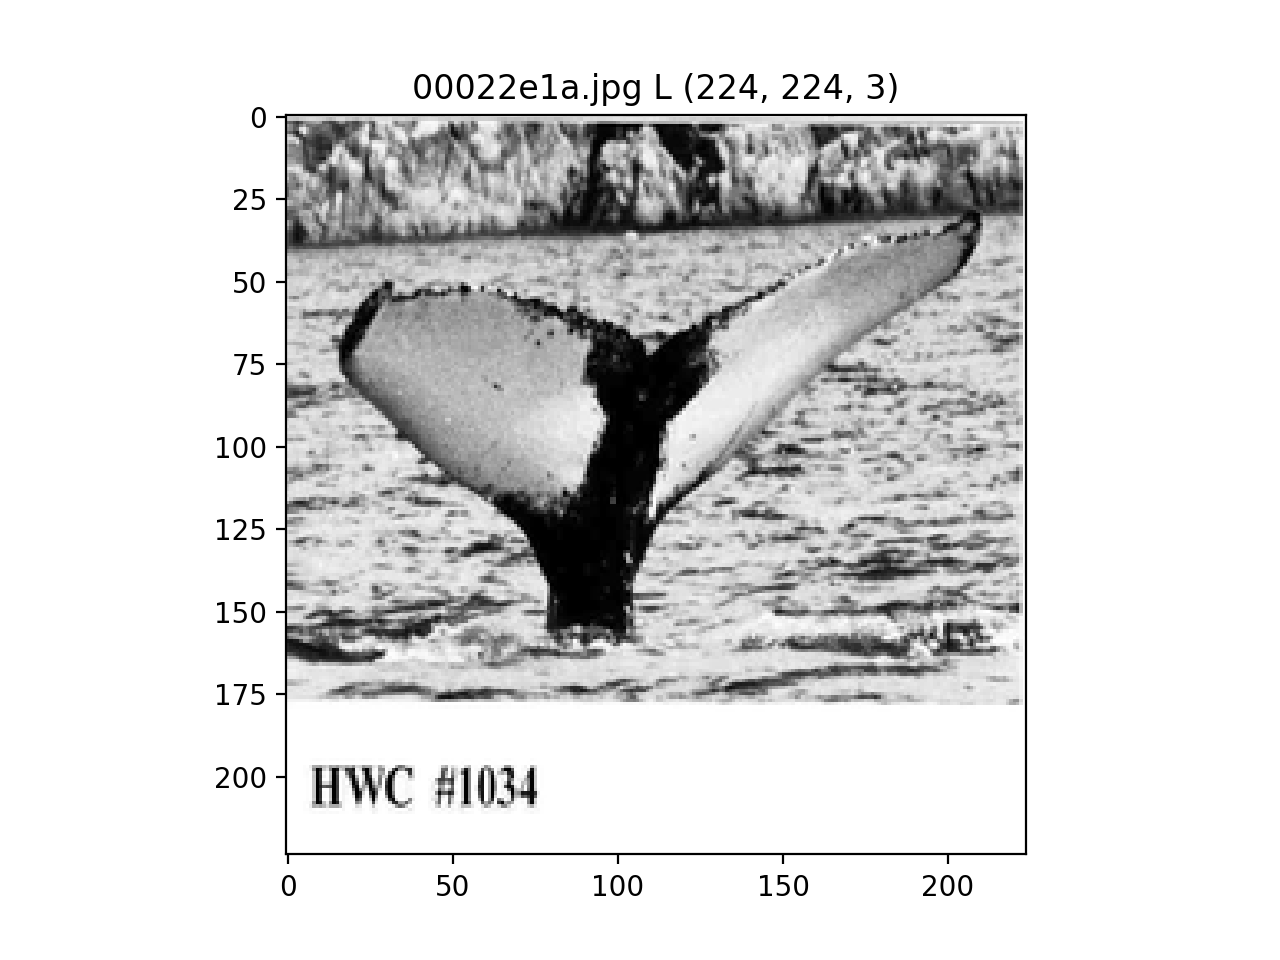

<IPython.core.display.Javascript object>


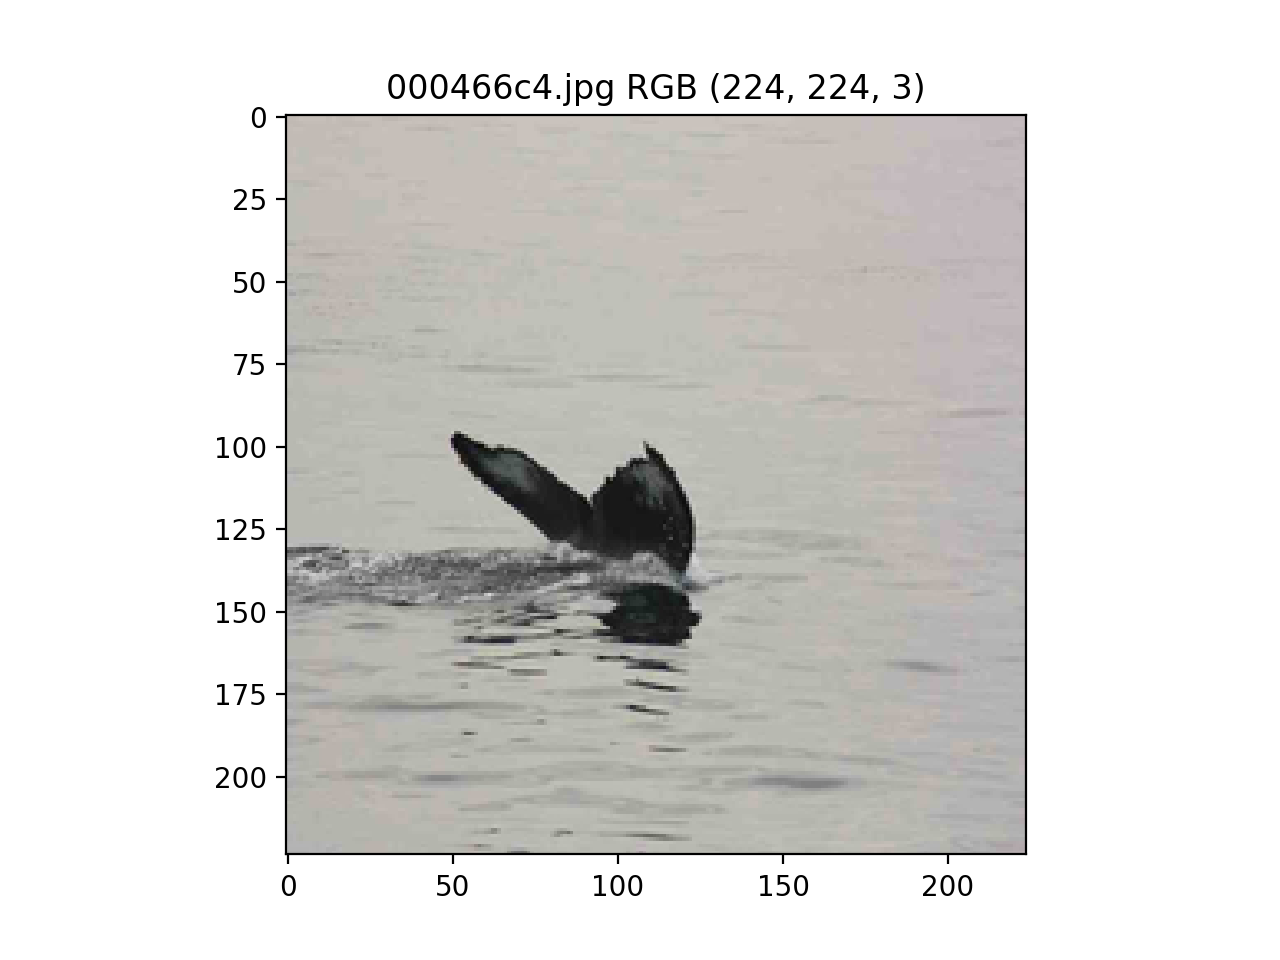

<IPython.core.display.Javascript object>


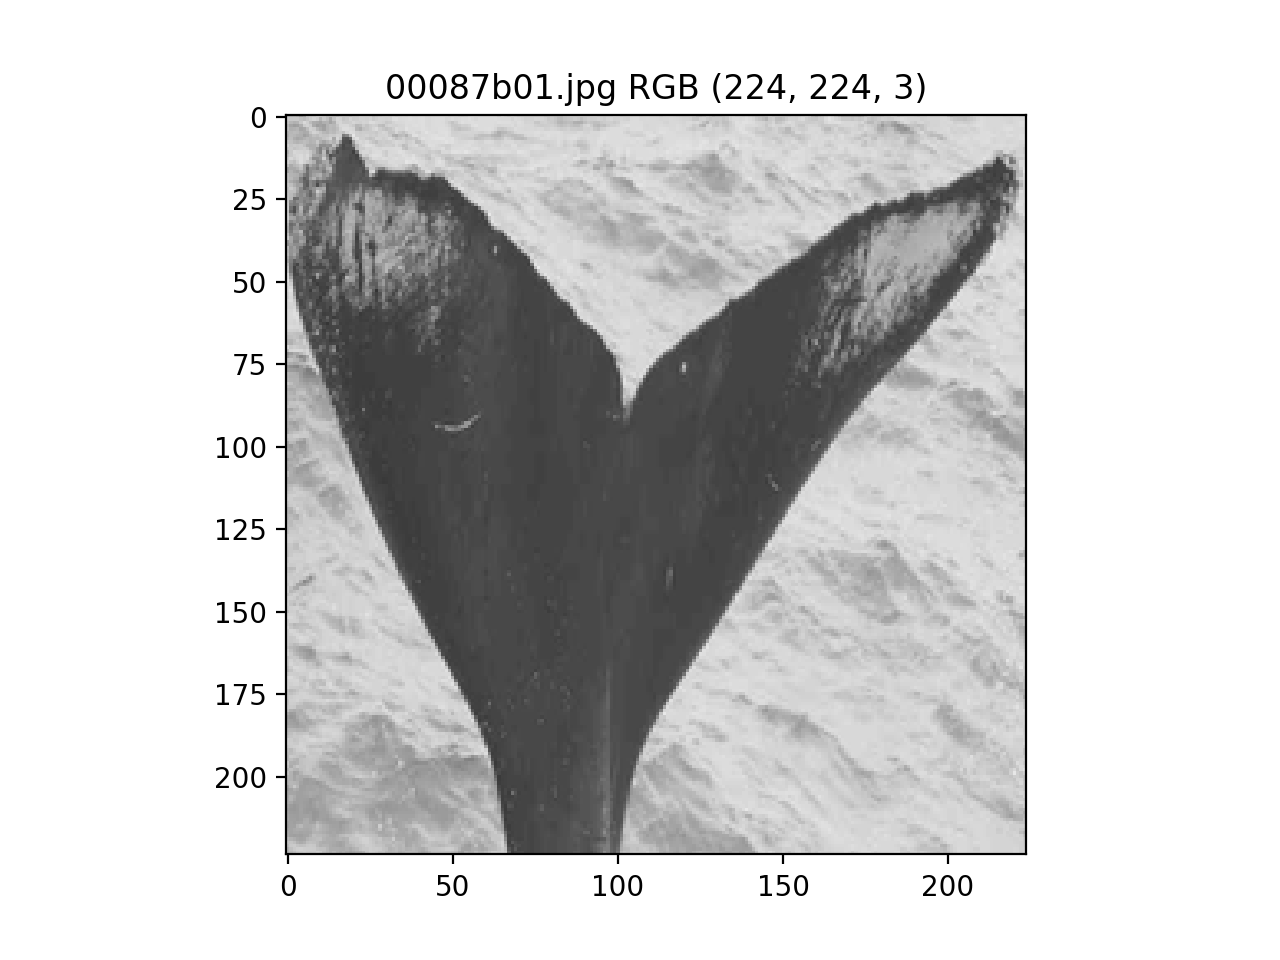

In [92]:
from PIL import Image
from matplotlib.pyplot import imshow

def read_image(filename):
    # read the image and return a bitmap
    pil_im = Image.open("train/{}".format(filename), 'r')
    
    raw_mode = pil_im.mode
    # If greyscale, convert to 3 channel RGB image
    if pil_im.mode == "L":
        pil_im = pil_im.convert('RGB')
        
    return pil_im, raw_mode

def preview_image(filename):
    pil_im, mode = read_image(filename)
    pil_im = pil_im.resize((224, 224),  Image.ANTIALIAS)
    
    image = np.asarray(pil_im)
    _, axes = plt.subplots()
    
    plt.title("{} {} {}".format(filename, mode, np.asarray(pil_im).shape))
    axes.imshow(image, interpolation='nearest')

for image in training_values[:3]:
    preview_image(image)

## Analyzing the data

We have to find out frequency distribution of each whale tail classification. If some whale classification are underpresented, we have augment our dataset to make sure there is enough data for our model to learn from

In [133]:
new_df = pd.value_counts(train_data.Id).sort_index()
new_df.columns = ['Id', 'frequency']
print (new_df[:50])

new_whale    810
w_0013924      3
w_001ebbc      1
w_002222a      2
w_002b682      1
w_002dc11      1
w_0087fdd      2
w_008c602      1
w_009dc00      2
w_00b621b      2
w_00c4901      1
w_00cb685      3
w_00d8453      1
w_00fbb4e      2
w_0103030      1
w_010a1fa      2
w_011d4b5      2
w_0122d85      1
w_01319fa      1
w_0134192      1
w_013bbcf      1
w_014250a      2
w_014a645      1
w_0156f27      1
w_015c991      1
w_015e3cf      1
w_01687a8      2
w_0175a35      1
w_018bc64      1
w_01a4234      1
w_01a51a6      3
w_01a99a5      1
w_01ab6dc      1
w_01b2250      3
w_01c2cb0      2
w_01cbcbf      1
w_01d6ca0      1
w_01e1223      1
w_01f211f      2
w_01f8a43      1
w_01f9086      1
w_024358d      3
w_0245a27      1
w_0265cb6      2
w_026fdf8      2
w_028ca0d      1
w_029013f      1
w_02a768d      2
w_02b775b      2
w_02bb4cf      3
Name: Id, dtype: int64
